<a href="https://colab.research.google.com/github/Francofus/IMSE441/blob/main/Lab_11_FrancoFustagno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Titanic_train.csv"
df = pd.read_csv(url)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [9]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [10]:
df['Sex'].nunique()

2

In [11]:
df.groupby('Sex').size()

Sex
female    88
male      95
dtype: int64

<Axes: xlabel='Sex'>

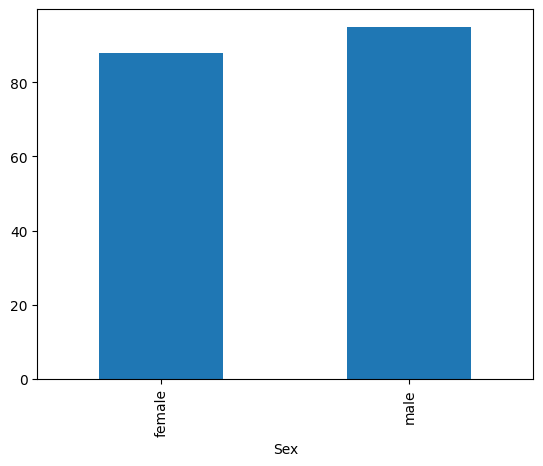

In [12]:
df.groupby('Sex').size().plot(kind='bar')

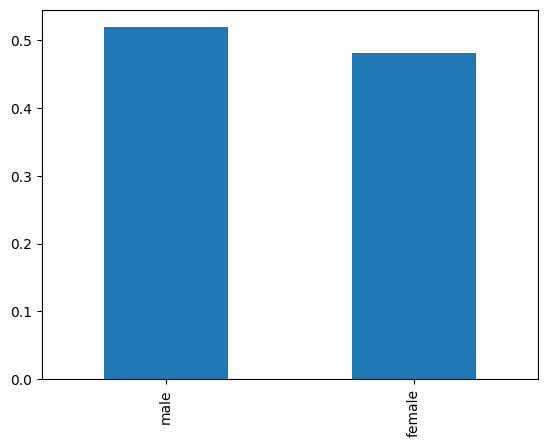

In [13]:
df['Sex'].value_counts(normalize=True).plot(kind='bar');

In [14]:
g= df.groupby('Sex').size()
g

Sex
female    88
male      95
dtype: int64

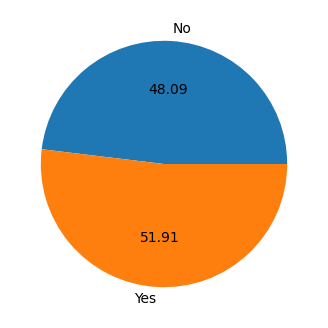

In [15]:
g.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

In [17]:
#Passengers in each class
df.groupby('Pclass').size()

Pclass
1    158
2     15
3     10
dtype: int64

<Axes: xlabel='Pclass'>

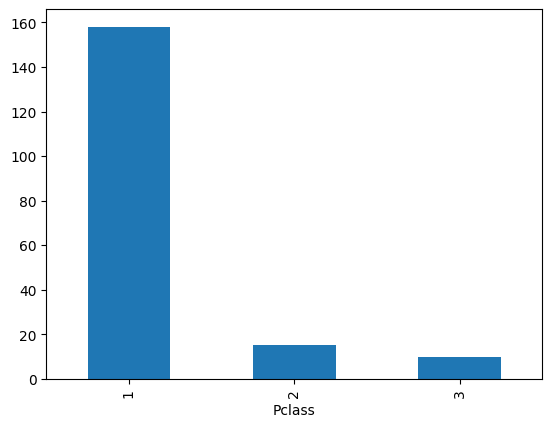

In [18]:
df.groupby('Pclass').size().plot(kind='bar')

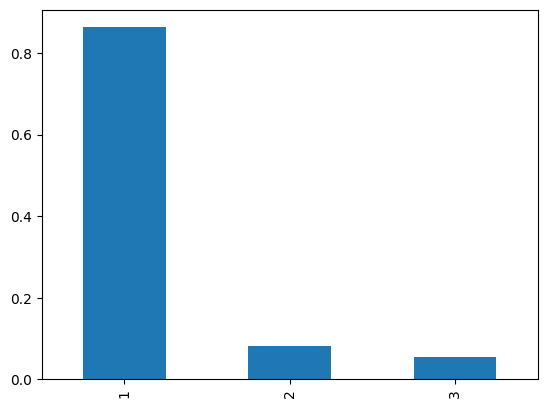

In [19]:
df['Pclass'].value_counts(normalize=True).plot(kind='bar');

In [22]:
f = df.groupby('Pclass').size()
f

Pclass
1    158
2     15
3     10
dtype: int64

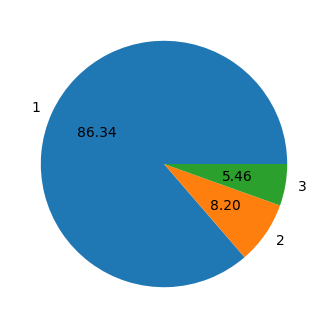

In [24]:
f.plot(kind='pie', labels=['1','2','3'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

In [25]:
#Survived or not
df.groupby('Survived').size()

Survived
0     60
1    123
dtype: int64

In [27]:
e = df.groupby('Survived').size()
e

Survived
0     60
1    123
dtype: int64

In [28]:
e.nunique()

2

<Axes: xlabel='Survived'>

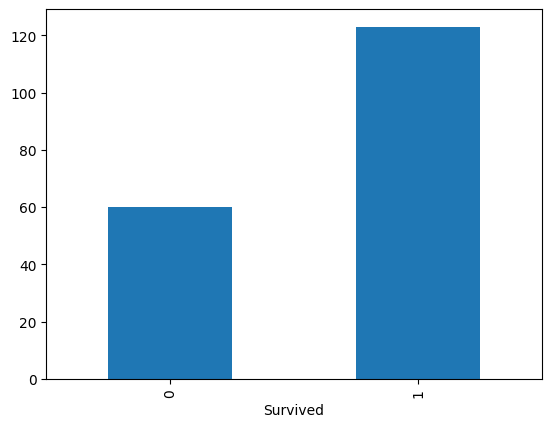

In [29]:
df.groupby('Survived').size().plot(kind='bar')

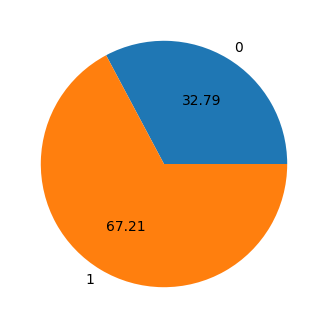

In [30]:
e.plot(kind='pie', labels=['0','1'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

In [31]:
#How many passengers from each port
d = df.groupby('Embarked').size()
d

Embarked
C     65
Q      2
S    116
dtype: int64

In [32]:
#min
df['Embarked'].min()

'C'

In [33]:
#max
df['Embarked'].max()

'S'

In [34]:
#how many survived from each port
w = df.groupby(['Embarked', 'Survived']).size().unstack()
w

Survived,0,1
Embarked,,
C,17,48
Q,1,1
S,42,74


<Axes: xlabel='Embarked'>

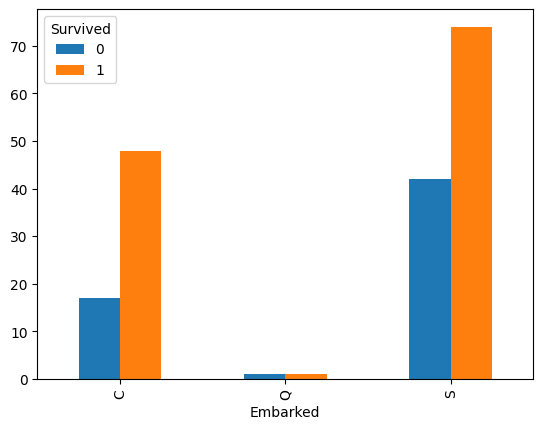

In [35]:
#bar plot
w.plot(kind = 'bar')

In [36]:
#display data for 2 siblings
len(df[(df['SibSp'] == 2)])

6

In [38]:
s = df[df['Survived'] == 1]  # those survived      
ns = df[df['Survived'] == 0]  # those NOT survived
print(len(s), len(ns))

123 60


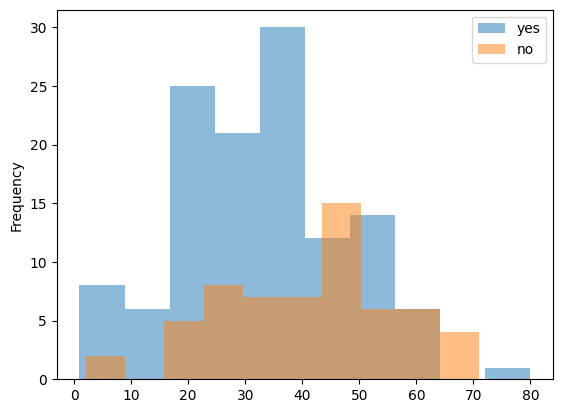

In [39]:
s['Age'].plot(kind = 'hist', alpha = 0.5)
ns['Age'].plot(kind = 'hist', alpha = 0.5)
plt.legend(['yes', 'no'])

In [40]:
r = df.groupby(['Pclass','Sex','Survived']).size().unstack()
r

Survived        0   1
Pclass Sex           
1      female   3  71
       male    49  35
2      female   1   8
       male     2   4
3      female   2   3
       male     3   2

<Axes: xlabel='Pclass,Sex'>

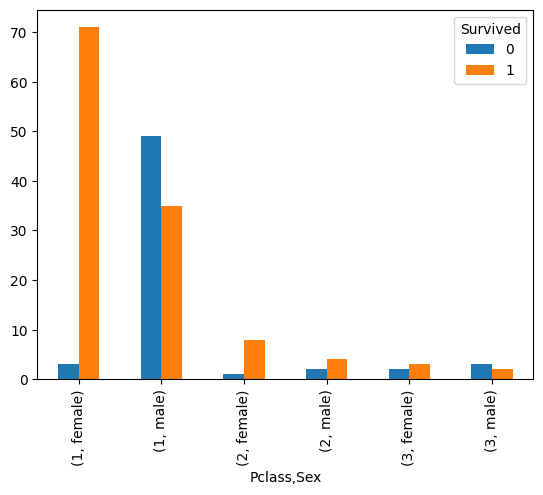

In [41]:
r.plot(kind = 'bar')

In [42]:
len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)])

71

In [43]:
len(df[(df['SibSp'] ==4)|(df['SibSp']==5)])

0

In [44]:
df['SibSp'].min()

0

In [45]:
df['SibSp'].max()  

3

In [47]:
len(df)

183

In [48]:
x = np.random.randn(183)

In [49]:
y = np.random.randn(183)

In [ ]:
df['Newcolx'] = x
df.head()


In [ ]:
df['Newcoly'] = y
df.head()

In [ ]:
%pip install pingouin
import pingouin as pg

Text(0.5, 1.0, 'OUR DATA')

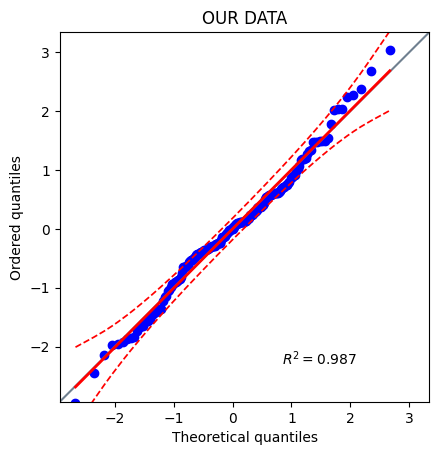

In [53]:
plt.show()            
pg.qqplot(df['Newcolx']).set_title('OUR DATA')